## Data Preprocessing
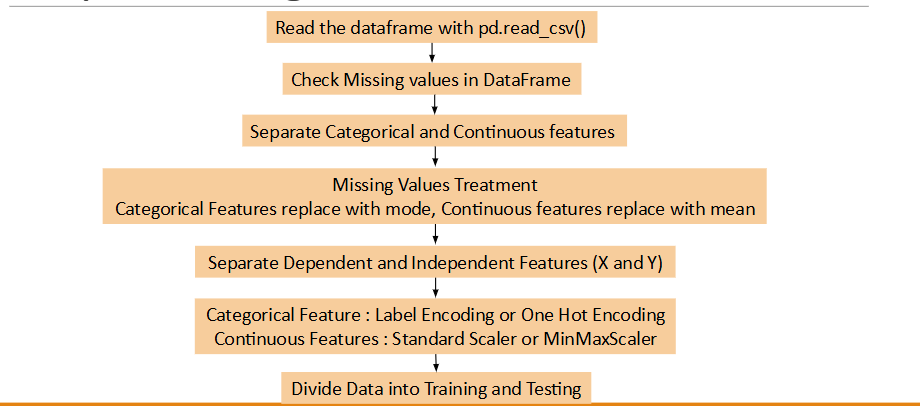

## Data Ingestion : Read the dataset

In [1]:
path = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\Cars93.csv"

In [2]:
import pandas as pd
df = pd.read_csv(path,na_values=["","NA"],keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
df.shape

(93, 28)

In [5]:
# CHeck for missing values
s = df.isna().sum()
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [6]:
df.duplicated().sum()

0

    since id is not present in out of sample data: remove id from df
    df = df.drop(columns="id")

## Data cleaning process
    Missing values are present in the dataset. Let's handle them 
        Categorical features:   Replace missing values with Mode
        Continuous features :   Replace missing values with Mean/Median

### Separate data into categorical and continuous features

In [7]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [8]:
df.columns[df.dtypes=="object"]

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

In [9]:
df.columns[df.dtypes!="object"]

Index(['id', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

In [10]:
cat = list(df.columns[df.dtypes=="object"])
con = list(df.columns[df.dtypes!="object"])
print(cat)
print(con)

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
['id', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']


In [11]:
for i in df.columns:
    print(i)

id
Manufacturer
Model
Type
Min.Price
Price
Max.Price
MPG.city
MPG.highway
AirBags
DriveTrain
Cylinders
EngineSize
Horsepower
RPM
Rev.per.mile
Man.trans.avail
Fuel.tank.capacity
Passengers
Length
Wheelbase
Width
Turn.circle
Rear.seat.room
Luggage.room
Weight
Origin
Make


In [12]:
df["Origin"].mode()[0]

'USA'

In [13]:
def handle_missing(df):
    for i in df.columns:
        if i in cat:
            md = df[i].mode()[0]
            df[i] = df[i].fillna(md)
        else:
            mn = df[i].mean()
            df[i] = df[i].fillna(mn)
    print("Missing values Handled")

In [14]:
handle_missing(df)

Missing values Handled


In [15]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

## Separate X and Y features
    X: Indepdent features
    Y: Dependent features/ Target Feature : Weight

In [48]:
X = df.drop(columns=["Weight","id"])
Y = df[["Weight"]]

In [50]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [51]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


In [52]:
df1 = df.copy()
df1.head(1)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra


In [53]:
df2 = df1.drop(columns="Weight")
df2.head(1)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra


In [54]:
df2.shape

(93, 27)

## Data Preprocessing

    Before training the model with complete data, we process the data and then train the model.

    Categorical:
    In order to make our machine understand text related information, we convert text data into numerical data with the help of encoding techniques

    Continuous:
    In order to bring all the columns to a column scale, we convert numerical columns into a standard scale using Normalization / Standardization

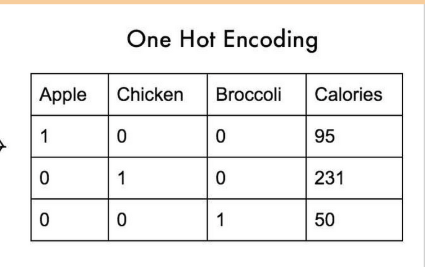

In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

    handle_unknown : If any unknown category is encountered by the machine, how should it handle 
        'error' : it is going to throw an error
        'ignore' : we are asking the machine to ignore it
        'warn': it will throw warnings
    
    sparse_output:
        sparse data: data contains many zeros or missing values
        sparse_output : False. we are mentioning the machine not to consider the output data as sparse data

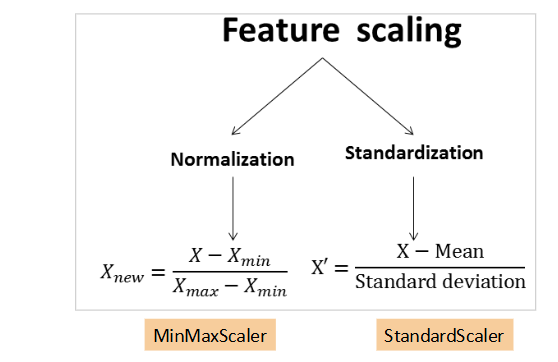

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().set_output(transform='pandas')

In [57]:
X_cat = X[cat]
X_cat.head(1)

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra


In [58]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [ ]:
#con.remove('Weight')

ValueError: list.remove(x): x not in list

In [60]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [62]:
con.remove('id')

In [63]:
X_con = X[con]
X_con.head(1)

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0


In [ ]:
X_cat_pre = ohe.fit_transform(X_cat)
X_cat_pre.head()

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X_con_pre = ss.fit_transform(X_con)
X_con_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186


In [65]:
X_pre = X_cat_pre.join(X_con_pre)
X_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228


## Build a model for final predictions

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_pre,Y)

LinearRegression()

In [67]:
model.score(X_pre,Y)

1.0

## Model Evaluation

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
def evaluate(modelname):
    # calculate ypred data
    ypred = model.predict(X_pre)

    # calculate MSE
    mse = mean_squared_error(Y,ypred)

    # calculate RMSE
    rmse = mse**(1/2)

    # calculate MAE
    mae = mean_absolute_error(Y,ypred)

    # calculate R2 score
    r2 = r2_score(Y,ypred)

    # print out all the values
    print(f"Mean squared error is {round(mse,2)}")
    print(f"Root Mean squared error is {round(rmse,2)}")
    print(f"Mean absolute error is {round(mae,2)}")
    print(f"R2 score is {round(r2*100,2)}%")

In [70]:
evaluate(model)

Mean squared error is 0.0
Root Mean squared error is 0.0
Mean absolute error is 0.0
R2 score is 100.0%


In [71]:
ypred = model.predict(X_pre)
ypred[:5]

array([[2705.],
       [3560.],
       [3375.],
       [3405.],
       [3640.]])

In [72]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## R2 score is 100% . Lets consider this for out of sample predictions

In [73]:
path = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\sample_cars93.csv"

In [74]:
xnew = pd.read_csv(path,na_values=["","NA"],keep_default_na=False)
xnew.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [75]:
handle_missing(xnew)

Missing values Handled


In [76]:
xnew_cat = xnew[cat]
xnew_cat

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Audi,100,Midsize,None,Front,6,Yes,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,None,Front,4,Yes,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,None,Front,4,No,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,Driver only,Rear,rotary,Yes,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,None,Front,4,Yes,non-USA,Volkswagen Fox


In [77]:
xnew_con = xnew[con]
xnew_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,30.8,37.7,44.6,19,26,2.8,172,5500,2535,15.0,6,190,106,65,37,31.000,17.0
1,9.4,11.1,12.8,23,31,2.0,110,5200,2665,15.2,5,181,101,66,39,25.000,13.0
2,13.4,15.9,18.4,21,29,2.2,110,5200,2595,16.5,6,198,108,71,40,28.500,16.0
3,32.5,32.5,32.5,17,25,1.3,255,6500,2325,20.0,2,169,96,69,37,27.625,14.0
4,8.7,9.1,9.5,25,33,1.8,81,5500,2550,12.4,4,163,93,63,34,26.000,10.0


In [79]:
xnew_cat_pre = ohe.fit_transform(xnew_cat)
xnew_cat_pre

,Manufacturer_Audi,Manufacturer_Chevrolet,Manufacturer_Mazda,Manufacturer_Pontiac,Manufacturer_Volkswagen,Model_100,Model_Fox,Model_Lumina,Model_RX-7,Model_Sunbird,...,Cylinders_rotary,Man.trans.avail_No,Man.trans.avail_Yes,Origin_USA,Origin_non-USA,Make_Audi 100,Make_Chevrolet Lumina,Make_Mazda RX-7,Make_Pontiac Sunbird,Make_Volkswagen Fox
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [80]:
xnew_con_pre = ss.fit_transform(xnew_con)
xnew_con_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.127781,1.413431,1.601780,-0.707107,-0.935414,1.586887,0.424120,-0.166957,0.008783,-0.330990,0.935414,0.758438,0.911300,-0.630126,-0.194257,1.620519,1.224745
1,-0.910607,-0.873507,-0.819161,0.707107,0.734968,-0.040689,-0.571919,-0.793045,1.150540,-0.250261,0.267261,0.061913,0.035050,-0.280056,0.777029,-1.260403,-0.408248
2,-0.529600,-0.460827,-0.392832,0.000000,0.066815,0.366205,-0.571919,-0.793045,0.535748,0.274479,0.935414,1.377570,1.261799,1.470294,1.262672,0.420134,0.816497
3,1.289709,0.966361,0.680604,-1.414214,-1.269491,-1.464819,1.757526,1.920003,-1.835595,1.687240,-1.737198,-0.866786,-0.841200,0.770154,-0.194257,0.000000,0.000000
4,-0.977283,-1.045458,-1.070391,1.414214,1.403122,-0.447584,-1.037808,-0.166957,0.140524,-1.380469,-0.400892,-1.331135,-1.366949,-1.330266,-1.651186,-0.780250,-1.632993


In [81]:
xnew_pre = xnew_cat_pre.join(xnew_con_pre)
xnew_pre

,Manufacturer_Audi,Manufacturer_Chevrolet,Manufacturer_Mazda,Manufacturer_Pontiac,Manufacturer_Volkswagen,Model_100,Model_Fox,Model_Lumina,Model_RX-7,Model_Sunbird,...,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.166957,0.008783,-0.330990,0.935414,0.758438,0.911300,-0.630126,-0.194257,1.620519,1.224745
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.793045,1.150540,-0.250261,0.267261,0.061913,0.035050,-0.280056,0.777029,-1.260403,-0.408248
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.793045,0.535748,0.274479,0.935414,1.377570,1.261799,1.470294,1.262672,0.420134,0.816497
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.920003,-1.835595,1.687240,-1.737198,-0.866786,-0.841200,0.770154,-0.194257,0.000000,0.000000
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.166957,0.140524,-1.380469,-0.400892,-1.331135,-1.366949,-1.330266,-1.651186,-0.780250,-1.632993


In [84]:
X_pre.columns

Index(['Manufacturer_Acura', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrylser', 'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Eagle',
       ...
       'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object', length=257)

In [85]:
xnew_pre.columns

Index(['Manufacturer_Audi', 'Manufacturer_Chevrolet', 'Manufacturer_Mazda',
       'Manufacturer_Pontiac', 'Manufacturer_Volkswagen', 'Model_100',
       'Model_Fox', 'Model_Lumina', 'Model_RX-7', 'Model_Sunbird',
       'Type_Compact', 'Type_Midsize', 'Type_Small', 'Type_Sporty',
       'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Front',
       'DriveTrain_Rear', 'Cylinders_4', 'Cylinders_6', 'Cylinders_rotary',
       'Man.trans.avail_No', 'Man.trans.avail_Yes', 'Origin_USA',
       'Origin_non-USA', 'Make_Audi 100', 'Make_Chevrolet Lumina',
       'Make_Mazda RX-7', 'Make_Pontiac Sunbird', 'Make_Volkswagen Fox',
       'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room'],
      dtype='object')

In [ ]:
#ypred_new = model.predict(xnew_pre)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- AirBags_Driver & Passenger
- Cylinders_3
- Cylinders_5
- Cylinders_8
- DriveTrain_4WD
- ...
